In [1]:
from boxdetect import config



#Start with getting the default PipelinesConfig and adjusting it for your requirements and data:
cfg = config.PipelinesConfig()

#important to adjust these values to match the size of boxes on your image
cfg.width_range = (9,20)
cfg.height_range = (9,20)


# the more scaling factors the more accurate the results but also it takes more time to processing
# too small scaling factor may cause false positives
# too big scaling factor will take a lot of processing time
cfg.scaling_factors = [1.3]

# w/h ratio range for boxes/rectangles filtering
cfg.wh_ratio_range = (0.5, 1.5)

# group_size_range starting from 2 will skip all the groups
# with a single box detected inside (like checkboxes)
cfg.group_size_range = (1, 1)

# num of iterations when running dilation tranformation (to engance the image)
cfg.dilation_iterations = 0

In [2]:
from boxdetect import config
from pdf2image import convert_from_path
import numpy as np

# Convert PDF to image first (boxdetect needs image, not PDF)
pages = convert_from_path('output.pdf', dpi=200)  # or try 150, 300
img = np.array(pages[0])

cfg = config.PipelinesConfig()

# Adjust these based on your actual checkbox size at chosen DPI
cfg.width_range = (20, 40)   # Typical for 200 DPI
cfg.height_range = (20, 40)  # Typical for 200 DPI

# Multiple scaling factors for better detection
cfg.scaling_factors = [0.8, 1.0, 1.2, 1.5]

# Good for square/slightly rectangular checkboxes
cfg.wh_ratio_range = (0.8, 1.2)

# Keep these as is
cfg.group_size_range = (1, 1)
cfg.dilation_iterations = 0

# Additional settings for PDFs
cfg.blur_size = (1, 1)  # Minimal blur for sharp PDFs
cfg.morph_kernels_type = 'rectangles'

# Quick test script
from measure_for_boxdetect import measure_and_suggest_config
measure_and_suggest_config('output.pdf')

Analyzing output.pdf to suggest boxdetect config...

--- Testing at 200 DPI ---
Found 320 checkbox-like squares
Size range: 8-40 pixels
Average size: 15.9 pixels

Suggested boxdetect config for 200 DPI:
cfg.width_range = (4, 43)
cfg.height_range = (4, 43)

--- Testing at 300 DPI ---
Found 486 checkbox-like squares
Size range: 8-64 pixels
Average size: 24.1 pixels

Suggested boxdetect config for 300 DPI:
cfg.width_range = (4, 67)
cfg.height_range = (4, 67)

--- Recommended Configuration ---

from boxdetect import config

cfg = config.PipelinesConfig()

# Based on your PDF analysis
cfg.width_range = (15, 35)   # Adjust based on output above
cfg.height_range = (15, 35)  # Adjust based on output above

# For better accuracy with PDFs
cfg.scaling_factors = [1.0, 1.2, 1.5]  # Multiple scales for robustness

# For square checkboxes
cfg.wh_ratio_range = (0.8, 1.2)  # Allow slightly rectangular boxes

# For individual checkboxes
cfg.group_size_range = (1, 1)

# Minimal dilation for cleaner edge

True

In [3]:
from pdf2image import convert_from_path
import numpy as np
from PIL import Image

In [4]:
file_name = 'output.pdf'

# Convert PDF to PIL Images (all pages)
pages = convert_from_path(file_name)

# Convert first page to numpy array
img = np.array(pages[0])

print(f"Image shape: {img.shape}")

Image shape: (2339, 1653, 3)


In [5]:
from boxdetect.pipelines import get_boxes

rects, grouping_rects, image, output_image = get_boxes(
    img, cfg=cfg, plot=False)

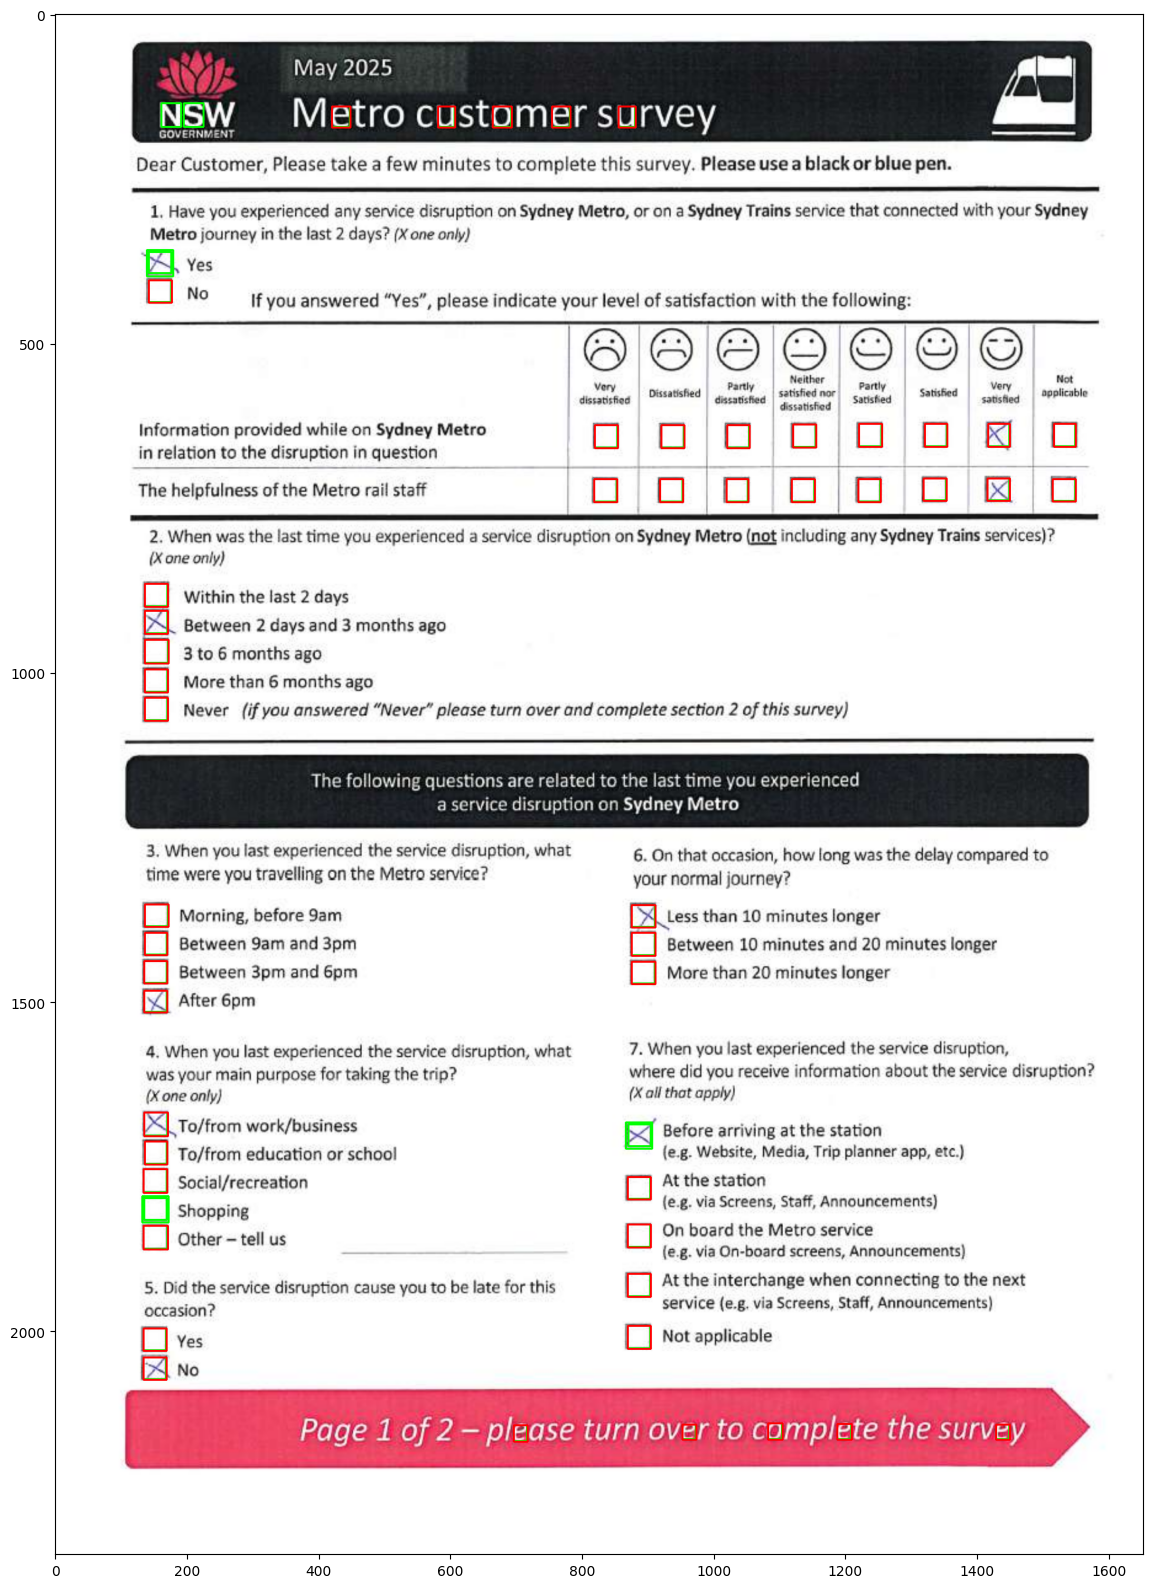

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
plt.imshow(output_image)
plt.show()